# Final Project 2: Exploratory Data Analysis on University Rankings

This case study consists of 3 parts: 


A. Data understanding and exploration
- Student to decide how to explore, inspect and cleanse the data 

B. Questions: 6 in total
- Answer the questions and derive the requested outputs with necessary explanations and inferences 

C. Open-ended Question 
- Student to decide the scope and methods/packages to use to answer the question and derive insights

The data reflects four years of ranking, 2012, 2013, 2014, 2015; 2012 and 2013 consists of the top 100 universities while 2014, and 2015 are the top 1000 universities. The data could be assessed on a yearly basis to uncover trends. 

The data was collected by The Center for World University Rankings. Sampling was weighted based on the following criteria: research output, (10%), high-quality publication, (10%), influence, (10%), citations, (10%), quality of faculty, (10%), alumni employment, (25%), quality of education, (25%). The totals of the above criteria is then used te create an aggregation and scoring. 

Data dictionary:
- World_rank - World rank for the university.
- Institution - Name of the university.
- Country - Country of each university.
- National_Rank - Rank of university within its country.
- Quality_of_education - Rank for quality of education; measured by the number of a university's alumni who have garnered major international accolades, i.e. Pulitzer, Nobel Prize.
- Alumni_employment - Rank for alumni employment; measured by the number of a university's alumni who have held CEO positions at multinational companies in relation to the university's size.
- Quality_of_faculty - Rank for quality of faculty; measured by the number of faculty who have won major international awards.
- Publications - Rank for publications.
- Influence - Rank for influence.
- Citations - Rank for citations.
- Broad_impact - Rank for broad impact (only available for 2014 and 2015).
- Patents - Rank for patents.
- Score - Total score, used for determining world rank.
- Year - Years of ranking (2012 to 2015).

# A. Data Understanding and exploration

### Read the cwur.Data.csv file and inspect the data, understand the data (what are the components, how it looks like, and some basic statistics about the variables). Take necessary steps to address any problems or issues with the data and fix them with appropriate measures.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("cwurData.csv")

In [4]:
# To see hows the data like
df.head(20)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,NaN,26,82.34,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,NaN,66,79.14,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,NaN,5,78.86,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,NaN,16,78.55,2012


In [5]:
df.tail()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015
2199,1000,China Pharmaceutical University,China,83,367,567,218,861,991,812,981.0,547,44.02,2015


In [6]:
# To see how many rows and columns inclusive
df.shape

(2200, 14)

In [7]:
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [8]:
# To check if any NA values
df.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [9]:
# Interested to see the value counts per country
Country_Sum = df["country"].value_counts()
Country_Sum

USA                     573
China                   167
Japan                   159
United Kingdom          144
Germany                 115
France                  109
Italy                    96
Spain                    81
South Korea              72
Canada                   72
Australia                58
Taiwan                   46
Brazil                   36
India                    31
Netherlands              29
Switzerland              26
Sweden                   24
Austria                  24
Israel                   22
Finland                  20
Turkey                   20
Belgium                  20
Poland                   18
Ireland                  16
Iran                     16
Portugal                 14
Greece                   14
Norway                   12
New Zealand              12
Hungary                  12
Hong Kong                12
Denmark                  12
Czech Republic           10
South Africa             10
Russia                    9
Egypt               

In [10]:
# dataframe the null values to further inspect. I don't see the major issue of the null values so decided to leave it aside for now
df2 = df[df.isnull().any(axis=1)]
df2

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,96,Australian National University,Australia,2,101,101,43,101,101,101,NaN,101,44.50,2013
196,97,University of Alberta,Canada,4,101,101,101,68,101,92,NaN,81,44.50,2013
197,98,University of Helsinki,Finland,1,69,101,81,74,79,71,NaN,101,44.39,2013
198,99,Paris Diderot University - Paris 7,France,5,28,101,72,101,87,101,NaN,101,44.36,2013


In [11]:
# To see what are the data types
df.dtypes

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

In [12]:
# Different method to view the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [13]:
df[["institution","broad_impact","year"]]

,institution,broad_impact,year
0,Harvard University,NaN,2012
1,Massachusetts Institute of Technology,NaN,2012
2,Stanford University,NaN,2012
3,University of Cambridge,NaN,2012
4,California Institute of Technology,NaN,2012
...,...,...,...
2195,University of the Algarve,969.0,2015
2196,Alexandria University,981.0,2015
2197,Federal University of Ceará,975.0,2015
2198,University of A Coruña,975.0,2015


In [14]:
df[["institution","broad_impact","year"]].sort_values("institution")

,institution,broad_impact,year
852,AGH University of Science and Technology,909.0,2014
1981,AGH University of Science and Technology,896.0,2015
792,Aalborg University,543.0,2014
1764,Aalborg University,520.0,2015
591,Aalto University,460.0,2014
...,...,...,...
1920,École normale supérieure de Cachan,826.0,2015
1670,École normale supérieure de Lyon,413.0,2015
661,École normale supérieure de Lyon,395.0,2014
1838,Örebro University,549.0,2015


In [15]:
df.year.value_counts()

2015    1000
2014    1000
2013     100
2012     100
Name: year, dtype: int64

In [16]:
df.institution.value_counts()

École normale supérieure - Paris              4
University of Copenhagen                      4
Rutgers University-New Brunswick              4
Stanford University                           4
University of Wisconsin–Madison               4
                                             ..
University of Maine (Le Mans)                 1
Southwest Jiaotong University                 1
University of Montpellier 2                   1
Moscow Institute of Physics and Technology    1
Iran University of Science and Technology     1
Name: institution, Length: 1024, dtype: int64

# B. Questions
### Answer the questions below based on the dataset. 

### 1. Focusing only on rows with world_rank smaller and inclusive of 100: Which country (throughout all years) has the most number universities within top 100 of world_rank? Let's call count of universities within top100 as 'count_100'. What are the top 10 countries by value of count_100, and what is count_100 for each of these countries?

In [17]:
df3 = pd.read_csv("cwurData.csv")

In [18]:
# Which country (throughout all years) has the most number universities within top 100 of world_rank? 
# Let's call count of universities within top100 as 'count_100'
count_100 = df3[df3.world_rank <= 100]
count_100

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,96,University of Zurich,Switzerland,4,115,389,85,56,46,68,56.0,137,51.14,2015
1296,97,Arizona State University,USA,55,367,455,66,143,85,76,140.0,21,51.13,2015
1297,98,Yonsei University,South Korea,2,367,45,218,140,326,321,235.0,23,51.02,2015
1298,99,University of Oslo,Norway,1,53,286,40,106,134,101,102.0,302,50.81,2015


In [19]:
# What are the top 10 countries by value of count_100
count_100["country"].value_counts().nlargest(10)

USA               223
United Kingdom     29
Japan              26
France             18
Switzerland        16
Israel             14
Canada             13
Germany            11
Australia           8
Netherlands         6
Name: country, dtype: int64

In [20]:
# what is count_100 for each of these countries?
# Grouping the top 100 university by each country
count_10 = count_100.groupby(["country","institution"])[("institution")].count()
count_10.head(50)

country      institution                                      
Australia    Australian National University                       1
             University of Melbourne                              2
             University of Queensland                             1
             University of Sydney                                 4
Belgium      Katholieke Universiteit Leuven                       2
Canada       McGill University                                    4
             University of Alberta                                1
             University of British Columbia                       4
             University of Toronto                                4
China        Peking University                                    2
             Tsinghua University                                  2
Denmark      University of Copenhagen                             4
Finland      University of Helsinki                               2
France       Mines ParisTech                         

### 2. For the top 10 countries with largest amount of top100 universities, What is the percentage composition of each countries' count_100 out of the 10 countries? (ie. the 10 countries make up 100%) 

In [21]:
top_10 = count_100["country"].value_counts().nlargest(10)
top_10

USA               223
United Kingdom     29
Japan              26
France             18
Switzerland        16
Israel             14
Canada             13
Germany            11
Australia           8
Netherlands         6
Name: country, dtype: int64

In [22]:
# wanted to change back to Dataframe so some of the feature
top_10 = top_10.to_frame()
top_10

,country
USA,223
United Kingdom,29
Japan,26
France,18
Switzerland,16
Israel,14
Canada,13
Germany,11
Australia,8
Netherlands,6


In [23]:
top_10.columns = ["count_100"]

In [24]:
top_10

,count_100
USA,223
United Kingdom,29
Japan,26
France,18
Switzerland,16
Israel,14
Canada,13
Germany,11
Australia,8
Netherlands,6


In [25]:
top_10["perc"] = (top_10.count_100/top_10.count_100.sum())*100

In [26]:
top_10

,count_100,perc
USA,223,61.263736
United Kingdom,29,7.967033
Japan,26,7.142857
France,18,4.945055
Switzerland,16,4.395604
Israel,14,3.846154
Canada,13,3.571429
Germany,11,3.021978
Australia,8,2.197802
Netherlands,6,1.648352


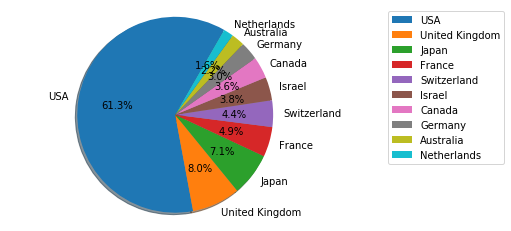

In [28]:
# Took an extra step to create a pie chart as I was curious to see the contrast of the percentage.
sizes = top_10["perc"]
labels = top_10.index
explode = (0, 0.1, 0, 0)

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=60)
ax.axis('equal')
ax.legend(loc=1, bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

### 3. Plot a graph showing the top 5 countries from Q2 and their counts

In [29]:
top_5 = count_100["country"].value_counts().nlargest(5)
top_5

USA               223
United Kingdom     29
Japan              26
France             18
Switzerland        16
Name: country, dtype: int64

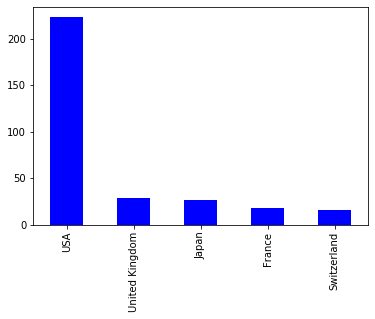

In [30]:
top_5.plot(color="blue",x="country", y = "count",kind="bar")

### 4. Groupby year and country showing the count of universities with world_rank within top 100 for that country and year. Set the name for column of counts as 'count_top100'. Sort the year in ascending order while count_top100 in descending order. See the table below as example output.

In [31]:
#Groupby year and country showing the count of universities with world_rank within top 100 for that country and year.
count_top100 = count_100.groupby(["year","country"])[("institution")].count()
count_top100

year  country       
2012  Australia          2
      Canada             3
      Denmark            1
      Finland            1
      France             5
                        ..
2015  Sweden             1
      Switzerland        4
      Taiwan             1
      USA               55
      United Kingdom     7
Name: institution, Length: 72, dtype: int64

In [32]:
# Set the name for column of counts as 'count_top100'
count_top100=count_top100.reset_index(name="count_top100")
count_top100

,year,country,count_top100
0,2012,Australia,2
1,2012,Canada,3
2,2012,Denmark,1
3,2012,Finland,1
4,2012,France,5
...,...,...,...
67,2015,Sweden,1
68,2015,Switzerland,4
69,2015,Taiwan,1
70,2015,USA,55


In [33]:
# Sort the year in ascending order while count_top100 in descending order.
count_top100.sort_values(['year', 'count_top100'], ascending=[True, False])

,year,country,count_top100
14,2012,USA,58
15,2012,United Kingdom,8
4,2012,France,5
8,2012,Japan,5
6,2012,Israel,4
...,...,...,...
63,2015,Norway,1
64,2015,Russia,1
65,2015,Singapore,1
67,2015,Sweden,1


### 5. Use an appropriate visual chart to display the trend for the count of top 100 universities for Japan, China and Singapore for years 2012 - 2015 in a single chart.

In [34]:
countryThree = count_top100[count_top100.country.isin(["Japan","China","Singapore"])]
countryThree

,year,country,count_top100
8,2012,Japan,5
24,2013,Japan,6
28,2013,Singapore,1
37,2014,China,2
43,2014,Japan,8
46,2014,Singapore,1
56,2015,China,2
61,2015,Japan,7
65,2015,Singapore,1


In [35]:
countryThree.groupby(["year","country"]).sum()

count_top100
year country                
2012 Japan                 5
2013 Japan                 6
     Singapore             1
2014 China                 2
     Japan                 8
     Singapore             1
2015 China                 2
     Japan                 7
     Singapore             1

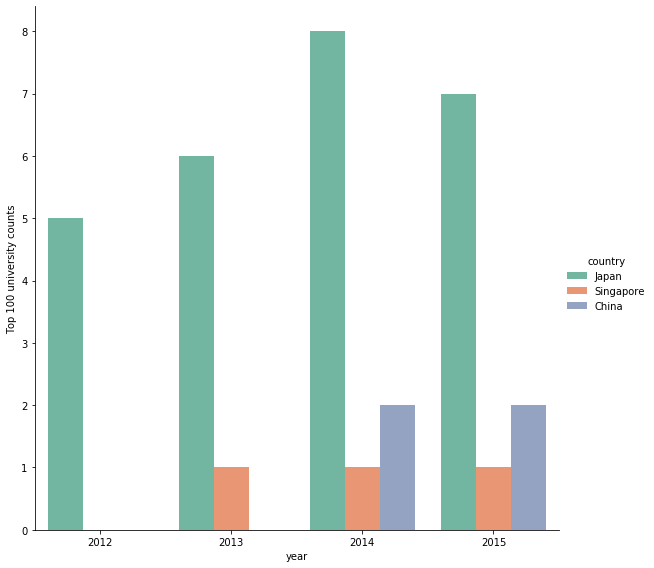

In [36]:
countryThree_plot = sns.catplot(
    data=countryThree, kind="bar",
    x="year", y="count_top100", hue="country"
    , palette="Set2", height=8
)


countryThree_plot.set_axis_labels("year", "Top 100 university counts")


### 6. For top 10 universities in 2015, what was the trend for world_rank for those universities across all the years? Which universities generally improved, and which ones declined in world_rank? Use an appropriate visual to show the trend and explain the results.

In [37]:
df4= count_100[count_100.year == 2015]  #to filter out all the universities in 2015 from the top 100 list
df4 = df4[df4.world_rank <=10]   #to filter out the top 10 universities in 2015
df4.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
1200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.00,2015
1201,2,Stanford University,USA,2,9,2,4,5,3,3,4.0,10,98.66,2015
1202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,97.54,2015
1203,4,University of Cambridge,United Kingdom,1,2,10,5,11,6,12,13.0,48,96.81,2015
1204,5,University of Oxford,United Kingdom,2,7,13,10,7,12,7,9.0,15,96.46,2015


In [38]:
df5 = count_100[count_100.institution.isin(df4.institution)]
df5.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012


Text(0, 0.5, 'World Rank')

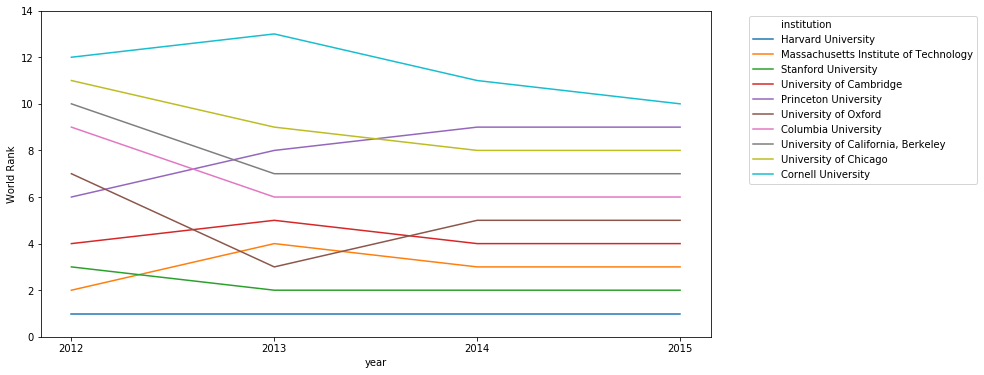

In [39]:
# Top 10 universities in 2015, comparing their trend across all years

fig, ax = plt.subplots(figsize=(12,6))

sns.lineplot(
    data=df5,
    x="year", y="world_rank", hue="institution"
    , palette="tab10", ax=ax)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticks([2012,2013,2014,2015])
ax.set_ylim([0,14])
ax.set_ylabel("World Rank")


In [ ]:
# To export the plot chart into png
fig.savefig("Trend.png", bbox_inches = "tight")

# C. OPEN ENDED QUESTION (Choose 1 among the following)
### Option 1: What are some of the factors (variables) that may be related to the world_rank and/or score? Is there any trends indicating shift in importance of factors influencing world_rank over the years or between countries? 

### Option 2: What are the relationships between the factors (variables) themselves? Is there any interesting patterns that can be detected? You may also choose to discuss yearly or country trends or a mixture of both. 

### For either of the above, you may choose to pick around 3-4 factors to deep-dive (how many factors to analyse is up to you). Additionally, if there's any other interesting insights about the data, you may also include in your analysis. 

In [51]:
import plotly
import plotly.offline as offline

import plotly.graph_objs as go
import plotly.figure_factory as ff

offline.init_notebook_mode(connected=True)

In [40]:
#copied of original data as I didn't want to affect above cells
df_new = df.copy()
df_new.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [41]:
# To filter top 10 world_rank across all the years as I find the dataset is too large, so wanted to narrow down a group of data to analysis
df_new2 = df_new[df_new.world_rank <= 10]
df_new2.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


Text(0.5, 0, 'Years')

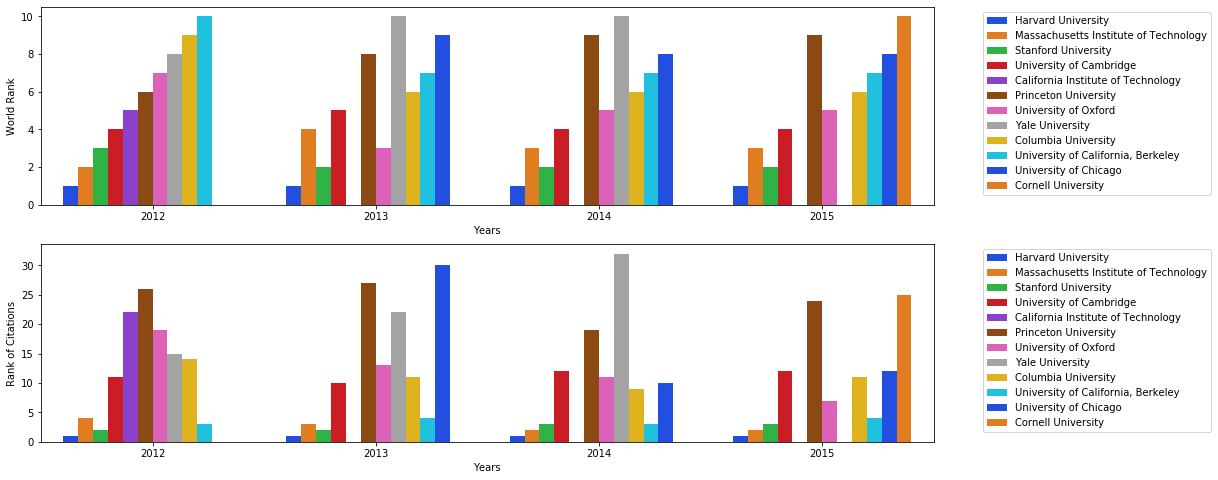

In [42]:
# To see the trend of University, any interesting factors that determine the world ranking

fig2, (ax1,ax2) = plt.subplots(figsize=(16,8), nrows = 2, ncols =1)

sns.barplot(data=df_new2, x="year", y="world_rank", hue="institution", palette= "bright", ax=ax1)
sns.barplot(data=df_new2, x="year", y="citations", hue="institution", palette= "bright", ax=ax2)


ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set_ylabel("World Rank")
ax1.set_xlabel("Years")
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.set_ylabel("Rank of Citations")
ax2.set_xlabel("Years")


Text(0.5, 0, 'Years')

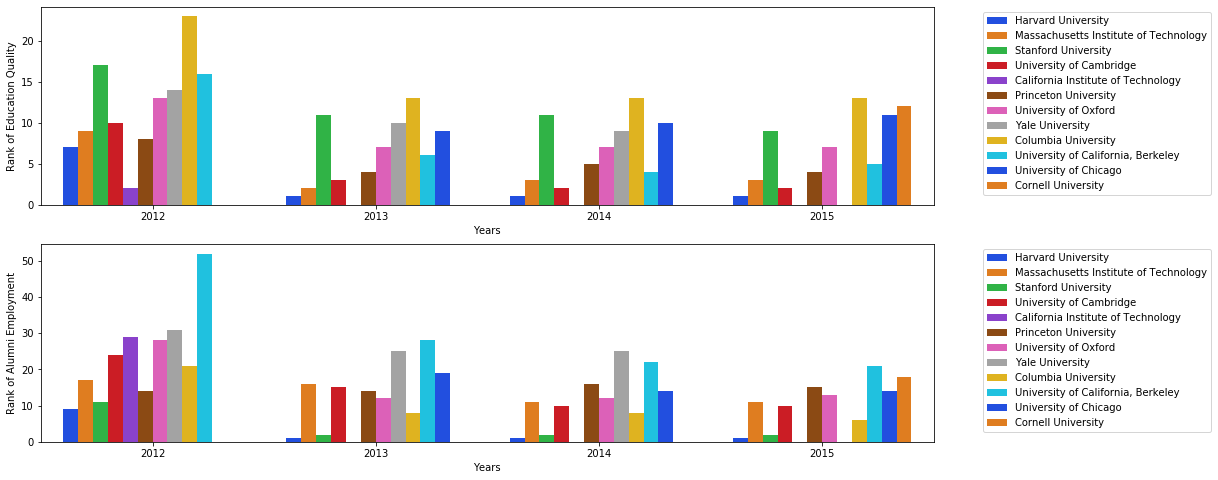

In [43]:
fig3, (ax3,ax4) = plt.subplots(figsize=(16,8), nrows = 2, ncols =1)

sns.barplot(data=df_new2, x="year", y="quality_of_education", hue="institution", palette= "bright", ax=ax3)
sns.barplot(data=df_new2, x="year", y="alumni_employment", hue="institution", palette= "bright", ax=ax4)


ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.set_ylabel("Rank of Education Quality")
ax3.set_xlabel("Years")
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.set_ylabel("Rank of Alumni Employment")
ax4.set_xlabel("Years")


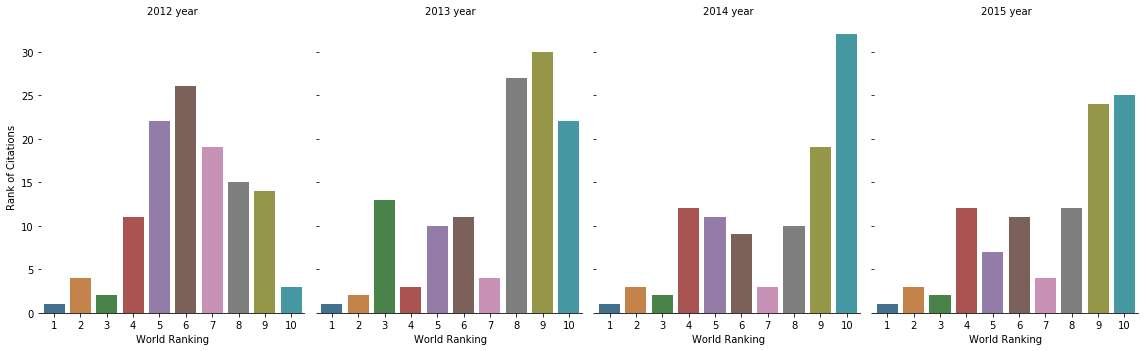

In [45]:
citations = sns.catplot(x="world_rank", y="citations", col="year",
                data=df_new2, saturation=.5,
                kind="bar", aspect=.8)

citations.set_axis_labels("World Ranking", "Rank of Citations")
citations.set_titles("{col_name} {col_var}")
citations.despine(left=True)

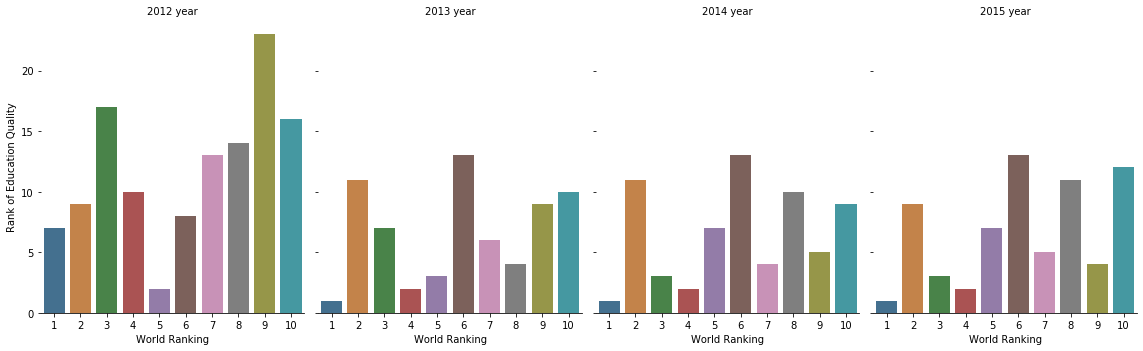

In [46]:
Edu = sns.catplot(x="world_rank", y="quality_of_education", col="year",
                data=df_new2, saturation=.5,
                kind="bar", aspect=.8)

Edu.set_axis_labels("World Ranking", "Rank of Education Quality")
Edu.set_titles("{col_name} {col_var}")
Edu.despine(left=True)

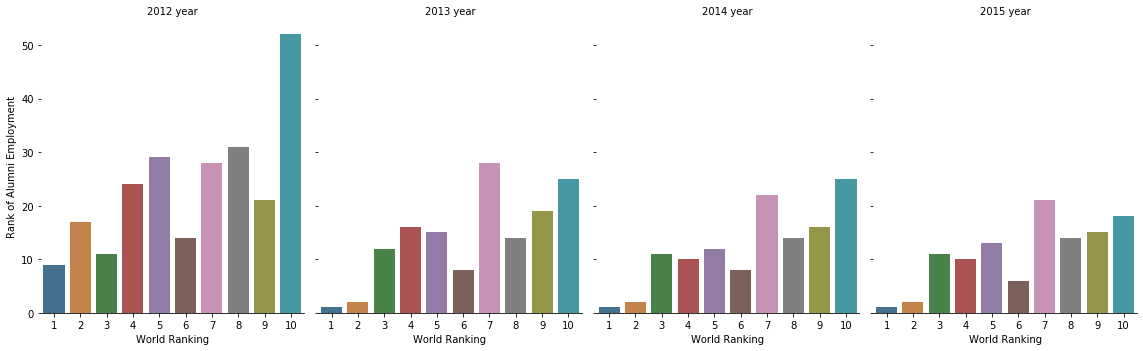

In [47]:
Alum = sns.catplot(x="world_rank", y="alumni_employment", col="year",
                data=df_new2, saturation=.5,
                kind="bar", aspect=.8)

Alum.set_axis_labels("World Ranking", "Rank of Alumni Employment")
Alum.set_titles("{col_name} {col_var}")
Alum.despine(left=True)

In [52]:
df2012 = df_new2[df_new2.year == 2012].iloc[:100, :]
df2013 = df_new2[df_new2.year == 2013].iloc[:100, :]
df2014 = df_new2[df_new2.year == 2014].iloc[:100, :]
df2015 = df_new2[df_new2.year == 2015].iloc[:100, :]


In [53]:
# To plot for overview on Rank of Citation on year 2012 for the top 10 university
trace0 = go.Scatter(
                    x=df2012.world_rank,
                    y=df2012.citations,
                    mode="lines+markers",
                    name="2012",
                    marker=dict(color="blue"),
                    text=df2012.institution+','+df2012.country,
                    )

trace1 = go.Scatter(
                    x=df2013.world_rank,
                    y=df2013.citations,
                    mode="lines",
                    name="2013",
                    marker=dict(color="red"),
                    text=df2013.institution+','+df2013.country,
                    )

trace2 = go.Scatter(
                    x=df2014.world_rank,
                    y=df2014.citations,
                    mode="lines",
                    name="2014",
                    marker=dict(color="green"),
                    text=df2014.institution+','+df2014.country,
                    )

trace3 = go.Scatter(
                    x=df2015.world_rank,
                    y=df2015.citations,
                    mode="lines",
                    name="2015",
                    marker=dict(color="purple"),
                    text=df2015.institution+','+df2015.country,
                    )

data =[trace0, trace1, trace2, trace3]

layout=go.Layout(title="Citation vs world rank of top 10 universities between 2012 to 2015 years",
                 xaxis = dict(title="World Ranks"),
                 yaxis = dict(title="Ranks of Citation"))

fig = go.Figure(data=data, layout=layout)

offline.iplot(fig)

In [54]:
# To plot for overview on Rank of Education Quality on year 2012 for the top 10 university
trace0 = go.Scatter(
                    x=df2012.world_rank,
                    y=df2012.quality_of_education,
                    mode="lines+markers",
                    name="2012",
                    marker=dict(color="blue"),
                    text=df2012.institution+','+df2012.country,
                    )

trace1 = go.Scatter(
                    x=df2013.world_rank,
                    y=df2013.quality_of_education,
                    mode="lines",
                    name="2013",
                    marker=dict(color="red"),
                    text=df2013.institution+','+df2013.country,
                    )

trace2 = go.Scatter(
                    x=df2014.world_rank,
                    y=df2014.quality_of_education,
                    mode="lines",
                    name="2014",
                    marker=dict(color="green"),
                    text=df2014.institution+','+df2014.country,
                    )

trace3 = go.Scatter(
                    x=df2015.world_rank,
                    y=df2015.quality_of_education,
                    mode="lines",
                    name="2015",
                    marker=dict(color="purple"),
                    text=df2015.institution+','+df2015.country,
                    )

data =[trace0, trace1, trace2, trace3]

layout=go.Layout(title="Education vs world rank of top 10 universities between 2012 to 2015 years",
                 xaxis = dict(title="World Ranks"),
                 yaxis = dict(title="Ranks of Education Quality"))

fig = go.Figure(data=data, layout=layout)

offline.iplot(fig)

In [55]:
# To plot for overview on Rank of Education Quality on year 2012 for the top 10 university
trace0 = go.Scatter(
                    x=df2012.world_rank,
                    y=df2012.alumni_employment,
                    mode="lines+markers",
                    name="2012",
                    marker=dict(color="blue"),
                    text=df2012.institution+','+df2012.country,
                    )

trace1 = go.Scatter(
                    x=df2013.world_rank,
                    y=df2013.alumni_employment,
                    mode="lines",
                    name="2013",
                    marker=dict(color="red"),
                    text=df2013.institution+','+df2013.country,
                    )

trace2 = go.Scatter(
                    x=df2014.world_rank,
                    y=df2014.alumni_employment,
                    mode="lines",
                    name="2014",
                    marker=dict(color="green"),
                    text=df2014.institution+','+df2014.country,
                    )

trace3 = go.Scatter(
                    x=df2015.world_rank,
                    y=df2015.alumni_employment,
                    mode="lines",
                    name="2015",
                    marker=dict(color="purple"),
                    text=df2015.institution+','+df2015.country,
                    )

data =[trace0, trace1, trace2, trace3]

layout=go.Layout(title="Alumni Employement vs world rank of top 10 universities between 2012 to 2015 years",
                 xaxis = dict(title="World Ranks"),
                 yaxis = dict(title="Ranks of Alumni Employment"))

fig = go.Figure(data=data, layout=layout)

offline.iplot(fig)

In [56]:
trace0 = go.Scatter(
                    x=df2012.world_rank,
                    y=df2012.citations,
                    mode="lines+markers",
                    name="Citations",
                    marker=dict(color="blue"),
                    text=df2012.institution+','+df2012.country,
                    )

trace1 = go.Scatter(
                    x=df2012.world_rank,
                    y=df2012.quality_of_education,
                    mode="lines",
                    name="Education",
                    marker=dict(color="red"),
                    text=df2012.institution+','+df2012.country,
                    )

trace2 = go.Scatter(
                    x=df2012.world_rank,
                    y=df2012.alumni_employment,
                    mode="lines+markers",
                    name="Alumni",
                    marker=dict(color="purple"),
                    text=df2012.institution+','+df2012.country,
                    )

data =[trace0, trace1, trace2]

layout=go.Layout(title="Factors comparison with world rank of top 10 universities on year 2012",
                 xaxis = dict(title="World Ranks"),
                 yaxis = dict(title="Ranks"))

fig = go.Figure(data=data, layout=layout)

offline.iplot(fig)

In [57]:
trace0 = go.Scatter(
                    x=df2013.world_rank,
                    y=df2013.citations,
                    mode="lines+markers",
                    name="Citations",
                    marker=dict(color="blue"),
                    text=df2013.institution+','+df2013.country,
                    )

trace1 = go.Scatter(
                    x=df2013.world_rank,
                    y=df2013.quality_of_education,
                    mode="lines",
                    name="Education",
                    marker=dict(color="red"),
                    text=df2013.institution+','+df2013.country,
                    )

trace2 = go.Scatter(
                    x=df2013.world_rank,
                    y=df2013.alumni_employment,
                    mode="lines+markers",
                    name="Alumni",
                    marker=dict(color="purple"),
                    text=df2013.institution+','+df2013.country,
                    )

data =[trace0, trace1, trace2]

layout=go.Layout(title="Factors comparison with world rank of top 10 universities on year 2013",
                 xaxis = dict(title="World Ranks"),
                 yaxis = dict(title="Ranks"))

fig = go.Figure(data=data, layout=layout)

offline.iplot(fig)

In [58]:
trace0 = go.Scatter(
                    x=df2014.world_rank,
                    y=df2014.citations,
                    mode="lines+markers",
                    name="Citations",
                    marker=dict(color="blue"),
                    text=df2014.institution+','+df2014.country,
                    )

trace1 = go.Scatter(
                    x=df2014.world_rank,
                    y=df2014.quality_of_education,
                    mode="lines",
                    name="Education",
                    marker=dict(color="red"),
                    text=df2014.institution+','+df2014.country,
                    )

trace2 = go.Scatter(
                    x=df2014.world_rank,
                    y=df2014.alumni_employment,
                    mode="lines+markers",
                    name="Alumni",
                    marker=dict(color="purple"),
                    text=df2014.institution+','+df2014.country,
                    )

data =[trace0, trace1, trace2]

layout=go.Layout(title="Factors comparison with world rank of top 10 universities on year 2014",
                 xaxis = dict(title="World Ranks"),
                 yaxis = dict(title="Ranks"))

fig = go.Figure(data=data, layout=layout)

offline.iplot(fig)

In [59]:
trace0 = go.Scatter(
                    x=df2015.world_rank,
                    y=df2015.citations,
                    mode="lines+markers",
                    name="Citations",
                    marker=dict(color="blue"),
                    text=df2015.institution+','+df2015.country,
                    )

trace1 = go.Scatter(
                    x=df2015.world_rank,
                    y=df2015.quality_of_education,
                    mode="lines",
                    name="Education",
                    marker=dict(color="red"),
                    text=df2015.institution+','+df2015.country,
                    )

trace2 = go.Scatter(
                    x=df2015.world_rank,
                    y=df2015.alumni_employment,
                    mode="lines+markers",
                    name="Alumni",
                    marker=dict(color="purple"),
                    text=df2015.institution+','+df2015.country,
                    )

data =[trace0, trace1, trace2]

layout=go.Layout(title="Factors comparison with world rank of top 10 universities on year 2015",
                 xaxis = dict(title="World Ranks"),
                 yaxis = dict(title="Ranks"))

fig = go.Figure(data=data, layout=layout)

offline.iplot(fig)